In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import numpy as np 
import pandas as pd 
import os
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
hepatitis = pd.read_csv('hepatitis.data',na_values='?')
hepatitis.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [3]:
hepatitis = hepatitis.replace({"Class":{1: 0, 2: 1}})

In [4]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    int64  
 3   STEROID          154 non-null    float64
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          154 non-null    float64
 6   MALAISE          154 non-null    float64
 7   ANOREXIA         154 non-null    float64
 8   LIVER_BIG        145 non-null    float64
 9   LIVER_FIRM       144 non-null    float64
 10  SPLEEN_PALPABLE  150 non-null    float64
 11  SPIDERS          150 non-null    float64
 12  ASCITES          150 non-null    float64
 13  VARICES          150 non-null    float64
 14  BILIRUBIN        149 non-null    float64
 15  ALK_PHOSPHATE    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  ALBUMIN         

In [5]:
 hepatitis.isnull().sum()  

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
dtype: int64

In [6]:
hepatitis = hepatitis.fillna(hepatitis.mean())
hepatitis

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.000000,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,2,50,1,1.000000,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,2,78,1,2.000000,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,2,31,1,1.506494,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,2,34,1,2.000000,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.000000,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,105.325397,242.0,3.3,50.000000,2
151,2,44,1,2.000000,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.000000,142.0,4.3,61.852273,2
152,2,61,1,1.000000,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.000000,20.0,4.1,61.852273,2
153,2,53,2,1.000000,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.000000,19.0,4.1,48.000000,2


In [7]:
hepatitis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   AGE              155 non-null    int64  
 2   SEX              155 non-null    int64  
 3   STEROID          155 non-null    float64
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          155 non-null    float64
 6   MALAISE          155 non-null    float64
 7   ANOREXIA         155 non-null    float64
 8   LIVER_BIG        155 non-null    float64
 9   LIVER_FIRM       155 non-null    float64
 10  SPLEEN_PALPABLE  155 non-null    float64
 11  SPIDERS          155 non-null    float64
 12  ASCITES          155 non-null    float64
 13  VARICES          155 non-null    float64
 14  BILIRUBIN        155 non-null    float64
 15  ALK_PHOSPHATE    155 non-null    float64
 16  SGOT             155 non-null    float64
 17  ALBUMIN         

In [8]:
hepatitis.describe()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.506494,1.845161,1.350649,1.603896,1.792208,1.827586,1.583333,1.800000,1.660000,1.866667,1.880000,1.427517,105.325397,85.894040,3.817266,61.852273,1.451613
std,0.406070,12.565878,0.305240,0.499958,0.362923,0.477173,0.489086,0.405727,0.366536,0.476731,0.394771,0.467516,0.335491,0.320713,1.188301,46.405585,88.478932,0.616750,17.193528,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,32.500000,3.500000,57.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,102.000000,59.000000,3.900000,61.852273,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [9]:
hepatitis.corr(numeric_only=True)

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
Class,1.000000,-0.219647,0.173051,0.134586,-0.130196,0.309008,0.337574,0.132060,-0.072211,0.058701,0.234942,0.391982,0.470292,0.362988,-0.450470,-0.141005,-0.075579,0.465827,0.307238,-0.337856
AGE,-0.219647,1.000000,0.008126,-0.085547,-0.013100,-0.281920,-0.115112,0.090297,-0.099710,-0.102344,-0.071733,-0.172497,-0.063460,-0.046856,0.122884,0.008076,0.081052,-0.246169,-0.153312,0.170780
SEX,0.173051,0.008126,1.000000,-0.046971,-0.089249,-0.071795,-0.028809,0.017024,-0.072049,-0.059498,-0.053888,-0.040953,0.126820,0.053065,-0.056218,0.073253,-0.017625,0.005459,-0.009125,-0.137450
STEROID,0.134586,-0.085547,-0.046971,1.000000,0.059026,0.162721,0.241571,0.074045,0.207150,0.082941,0.075714,0.028120,-0.030937,-0.073674,-0.049046,-0.036167,-0.041837,0.215478,0.076930,-0.089868
ANTIVIRALS,-0.130196,-0.013100,-0.089249,0.059026,1.000000,-0.059410,-0.018529,-0.043526,0.042081,0.075062,-0.172228,-0.159207,-0.170661,-0.160672,0.181179,0.197594,0.107876,-0.165443,-0.027317,0.209242
FATIGUE,0.309008,-0.281920,-0.071795,0.162721,-0.059410,1.000000,0.595142,0.376350,0.110100,0.264041,0.193039,0.378981,0.286640,0.185000,-0.274053,-0.148967,-0.200156,0.312300,0.208383,-0.151150
MALAISE,0.337574,-0.115112,-0.028809,0.241571,-0.018529,0.595142,1.000000,0.599647,0.054958,0.113719,0.013453,0.320336,0.327147,0.167247,-0.295513,-0.195332,-0.203230,0.291312,0.201184,-0.140216
ANOREXIA,0.132060,0.090297,0.017024,0.074045,-0.043526,0.376350,0.599647,1.000000,0.087329,0.064345,0.040542,0.301253,0.190820,0.169671,-0.298286,-0.153764,-0.235023,0.155718,0.045273,-0.078684
LIVER_BIG,-0.072211,-0.099710,-0.072049,0.207150,0.042081,0.110100,0.054958,0.087329,1.000000,0.467611,0.095943,0.214687,-0.103184,-0.062096,-0.002389,-0.123215,0.038512,-0.053467,-0.063925,-0.069744
LIVER_FIRM,0.058701,-0.102344,-0.059498,0.082941,0.075062,0.264041,0.113719,0.064345,0.467611,1.000000,0.181142,0.345488,0.034961,0.188994,-0.057293,-0.326624,-0.122131,0.184792,0.042094,-0.184152


In [10]:
# sns.pairplot(data=hepatitis, hue='Class')

In [11]:
hepatitis

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.000000,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,2,50,1,1.000000,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,2,78,1,2.000000,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,2,31,1,1.506494,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,2,34,1,2.000000,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.000000,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,105.325397,242.0,3.3,50.000000,2
151,2,44,1,2.000000,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.000000,142.0,4.3,61.852273,2
152,2,61,1,1.000000,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.000000,20.0,4.1,61.852273,2
153,2,53,2,1.000000,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.000000,19.0,4.1,48.000000,2


In [13]:
data = hepatitis

# Data Scaling

In [14]:
X = data.drop('Class', axis=1)
y = data['Class'].astype(int)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train.T).T 
X_train_scaled

array([[ 0.64392264, -0.4461682 , -0.4461682 , ..., -0.40673938,
         0.24963446, -0.42297477],
       [ 1.00015465, -0.49397251, -0.49397251, ..., -0.36028745,
         2.8088349 , -0.49397251],
       [ 0.08117632, -0.40632869, -0.4334123 , ..., -0.35486982,
         1.21468702, -0.4334123 ],
       ...,
       [ 0.87733236, -0.48044391, -0.44562913, ..., -0.37599958,
         2.96621892, -0.48044391],
       [ 0.47867449, -0.44309733, -0.44309733, ..., -0.34067824,
         1.09318904, -0.44309733],
       [ 0.41625923, -0.49763659, -0.49763659, ..., -0.46108076,
         1.356118  , -0.46717339]])

In [19]:
X_test_scaled = scaler.fit_transform(X_test.T).T 
X_test_scaled

array([[ 1.34640062e+00, -4.66163675e-01, -4.29912389e-01,
        -4.29912389e-01, -4.66163675e-01, -4.29912389e-01,
        -4.29912389e-01, -4.29912389e-01, -4.66163675e-01,
        -4.66163675e-01, -4.66163675e-01, -4.29912389e-01,
        -4.66163675e-01, -4.66163675e-01,  3.31576612e+00,
         2.22610758e-01, -3.93661103e-01,  1.78141605e+00,
        -4.29912389e-01],
       [ 2.85537266e-01, -4.42678580e-01, -4.14670278e-01,
        -4.14670278e-01, -4.42678580e-01, -4.42678580e-01,
        -4.42678580e-01, -4.42678580e-01, -4.42678580e-01,
        -4.42678580e-01, -4.42678580e-01, -4.14670278e-01,
        -4.14670278e-01, -4.37076920e-01,  3.25441725e+00,
         2.27412669e+00, -3.55852845e-01,  6.21636887e-01,
        -4.42678580e-01],
       [ 1.21891486e+00, -5.25361487e-01, -5.25361487e-01,
        -4.92450612e-01, -5.25361487e-01, -5.25361487e-01,
        -4.92450612e-01, -4.92450612e-01, -4.92450612e-01,
        -4.92450612e-01, -4.92450612e-01, -5.25361487e-01,
    

# Feature_Importances

In [22]:
pca = PCA(n_components=2) #2-dimensional PCA transformation
X_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))

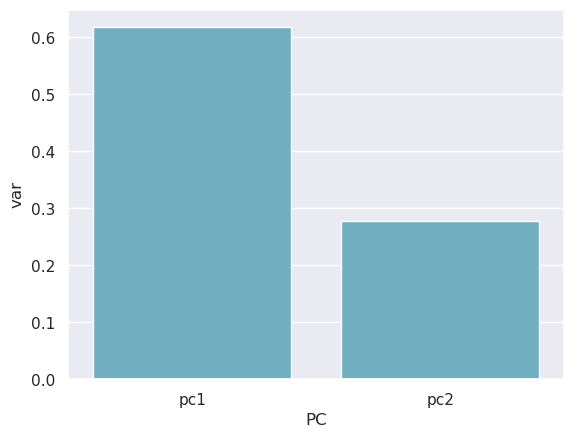

In [65]:
var = pd.DataFrame({'var':pca.explained_variance_ratio_,'PC':['pc1','pc2']})
sns.barplot(x='PC',y="var",data=var, color="c")
plt.show()

In [66]:
print(f'pca explains {round(pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1],2)*100}% of the initial variation of the data')

pca explains 89.0% of the initial variation of the data


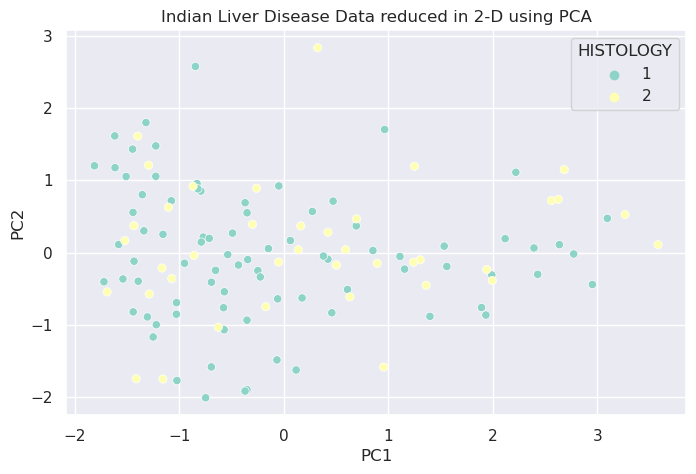

In [37]:
plt.figure(figsize=(8,5))
plt.title('Indian Liver Disease Data reduced in 2-D using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

sns.scatterplot(x=X_pca[0], y=X_pca[1], color='purple', hue = hepatitis.iloc[:,-1], palette = 'Set3')
plt.show()

/home/cmos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cmos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cmos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cmos/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/cmos/.local/lib/python3.10/site-pa

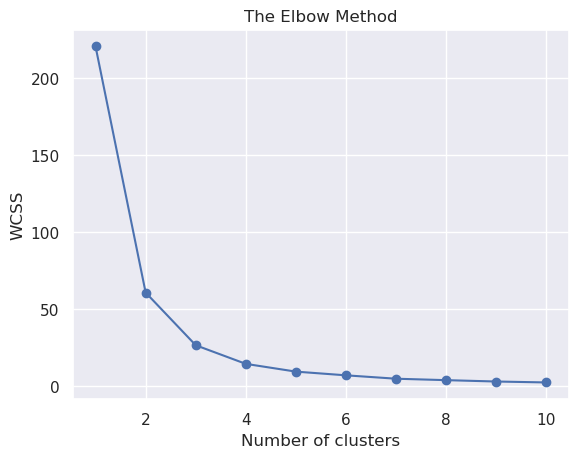

In [29]:
sns.set_theme()
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca.iloc[:,:-1])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=2, n_init=20, random_state=0, verbose=2)
kmeans.fit(X_pca)
k_means_labels = kmeans.labels_
centroids = kmeans.cluster_centers_
X_pca['target'] = hepatitis['Class']

Initialization complete
Iteration 0, inertia 228.42770768825721.
Iteration 1, inertia 178.3146390165386.
Iteration 2, inertia 161.22691120243465.
Iteration 3, inertia 159.3918488994806.
Iteration 4, inertia 159.33144407655658.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 188.28067169330257.
Iteration 1, inertia 170.3545421403161.
Iteration 2, inertia 161.93961176754019.
Iteration 3, inertia 159.39184889948058.
Iteration 4, inertia 159.33144407655658.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 224.45532464316594.
Iteration 1, inertia 170.07035573663336.
Iteration 2, inertia 160.7142963959063.
Iteration 3, inertia 159.39184889948058.
Iteration 4, inertia 159.33144407655658.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 200.18189788482442.
Iteration 1, inertia 164.8539716262987.
Iteration 2, inertia 160.7379208351148.
Iteration 3, inertia 160.372308118

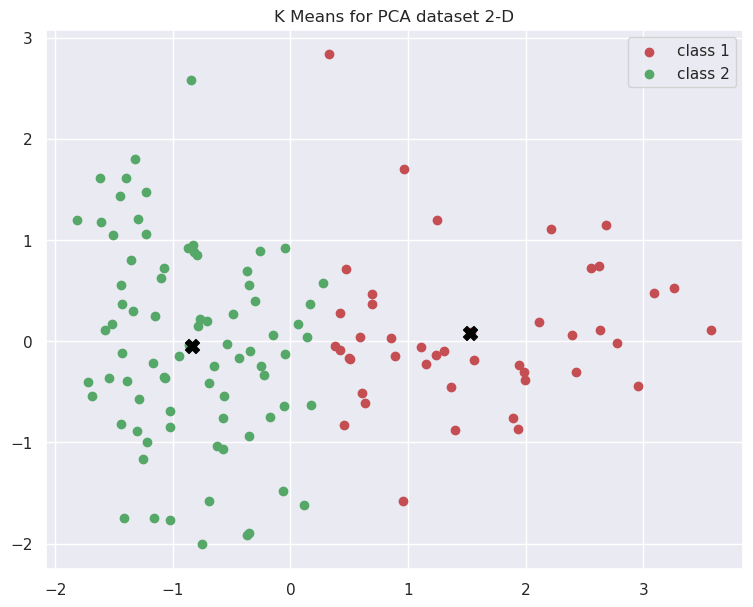

In [44]:
plt.figure(figsize = (9,7))
## plot the clusters

plt.scatter(x = X_pca[k_means_labels == 0][0], y = X_pca[k_means_labels == 0][1], c = 'r', label = 'class 1')
plt.scatter(x = X_pca[k_means_labels == 1][0], y = X_pca[k_means_labels == 1][1], c = 'g', label = 'class 2')

##plot the centroids

plt.scatter(x =centroids[0][0], y = centroids[0][1], c = 'black', marker = 'X', s=100 )
plt.scatter(x =centroids[1][0], y = centroids[1][1], c = 'black' , marker = 'X',s=100)

plt.title('K Means for PCA dataset 2-D')
plt.legend()
plt.show()

In [45]:
from sklearn.neighbors import NearestNeighbors

In [60]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_pca.iloc[:,:-1])
distances, indices = nbrs.kneighbors(X_pca.iloc[:,:-1])

In [61]:
distances = np.sort(distances[:,-1], axis = 0)

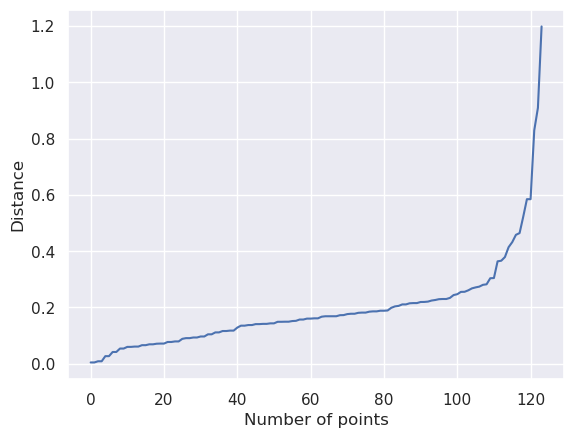

In [62]:
plt.plot(distances)
plt.xlabel('Number of points')
plt.ylabel('Distance')
plt.show()

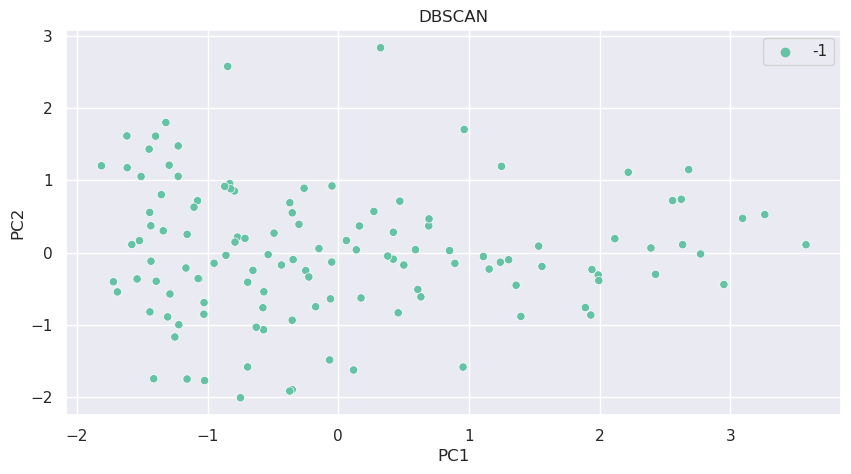

In [64]:
db = DBSCAN(eps=0.001, min_samples=3)
y_pred = db.fit_predict(X_pca.iloc[:,:-1])
plt.figure(figsize=(10,5))
sns.scatterplot(x = X_pca[0], y = X_pca[1],hue =y_pred, palette= 'Set2', color='purple')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("DBSCAN")
plt.show()

In [56]:
hc = AgglomerativeClustering(n_clusters = 2, linkage = 'ward')
y_hc = hc.fit_predict(X_pca.iloc[:,:-1])

In [57]:
Z = linkage(X_pca.iloc[:,:-1], 'ward')


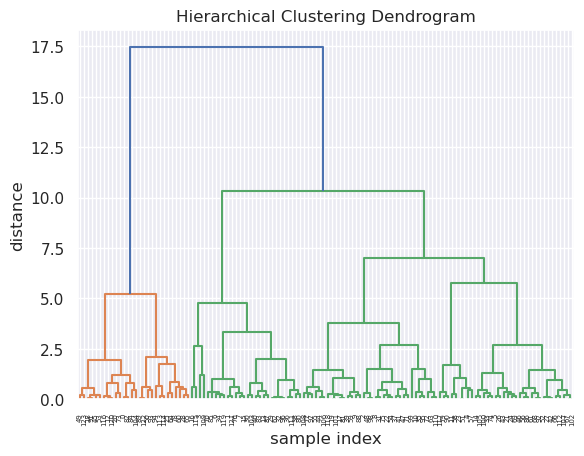

In [71]:
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90., 
    leaf_font_size=5.,  
)
plt.show()

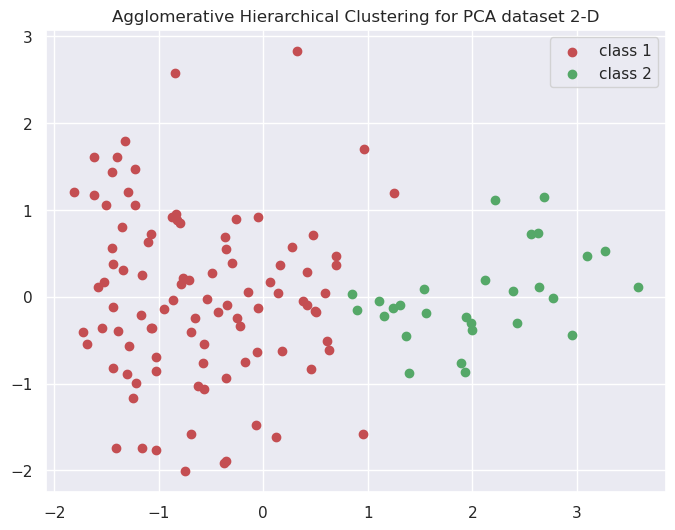

In [59]:
plt.figure(figsize = (8,6))
## plot the clusters
plt.scatter(x = X_pca[y_hc == 0][0], y = X_pca[y_hc == 0][1], c = 'r', label = 'class 1')
plt.scatter(x = X_pca[y_hc == 1][0], y = X_pca[y_hc == 1][1], c = 'g', label = 'class 2')


plt.title('Agglomerative Hierarchical Clustering for PCA dataset 2-D')
plt.legend()
plt.show()